In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import dataset
df = pd.read_csv('Crop.csv')
data_shape = df.shape

# Visualize the data
data_head = df.head()

# Information of data
data_info = df.info()
data_shape, data_head, data_info

# average,median,mode,variance
mean_values_annotated = ("Average Values:", df.mean())
median_values_annotated = ("Median Values:", df.median())
mode_values_annotated = ("Mode Values:", df.mode().iloc[0])
variance_values_annotated = ("Variance Values:", df.var())

mean_values_annotated, median_values_annotated, mode_values_annotated, variance_values_annotated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


C:\Users\77525\AppData\Local\Temp\ipykernel_14524\2290125048.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_annotated = ("Average Values:", df.mean())
C:\Users\77525\AppData\Local\Temp\ipykernel_14524\2290125048.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values_annotated = ("Median Values:", df.median())
C:\Users\77525\AppData\Local\Temp\ipykernel_14524\2290125048.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values_annotated = ("Varia

(('Average Values:',
  N               49.992727
  P               53.300000
  K               48.169545
  temperature     25.616244
  humidity        71.481779
  ph               6.469480
  rainfall       103.463655
  dtype: float64),
 ('Median Values:',
  N              37.000000
  P              51.000000
  K              31.000000
  temperature    25.598693
  humidity       80.473146
  ph              6.425045
  rainfall       94.867624
  dtype: float64),
 ('Mode Values:',
  N                   39.0
  P                   55.0
  K                   25.0
  temperature     8.825675
  humidity        14.25804
  ph              3.504752
  rainfall       20.211267
  label              apple
  Name: 0, dtype: object),
 ('Variance Values:',
  N              1383.531552
  P              1067.728968
  K              2567.701573
  temperature      25.641550
  humidity        495.677307
  ph                0.598980
  rainfall       3020.424469
  dtype: float64))

      Variable Outliers_Count        Mean        Std
0            N              0   49.992727  37.195854
1            P              0        53.3  32.676122
2            K             90   48.169545  50.672493
3  temperature             33   25.616244   5.063749
4     humidity              0   71.481779  22.263812
5           ph             30     6.46948   0.773938
6     rainfall             22  103.463655  54.958389


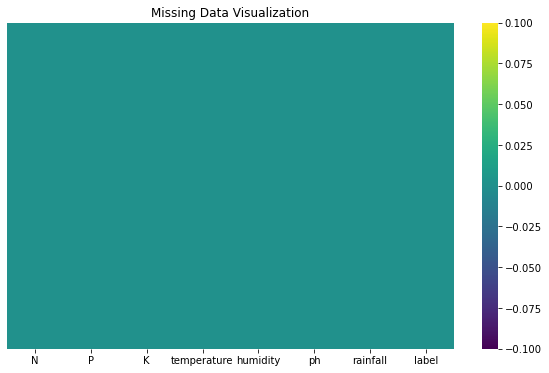

<Figure size 1080x720 with 0 Axes>

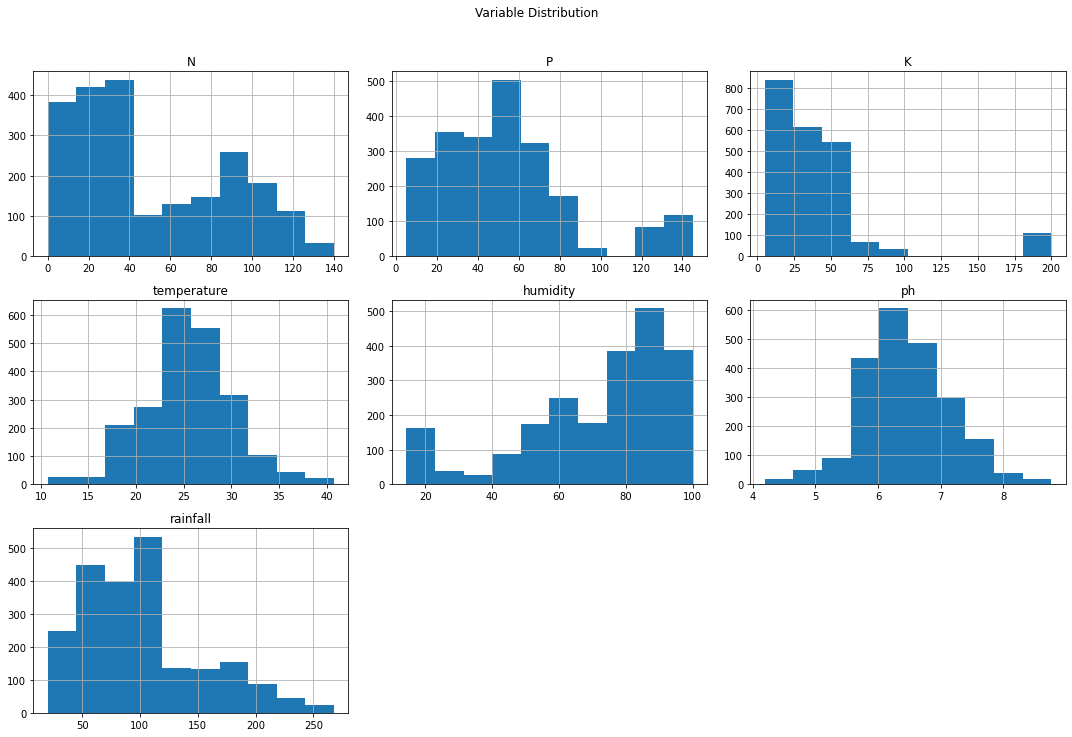

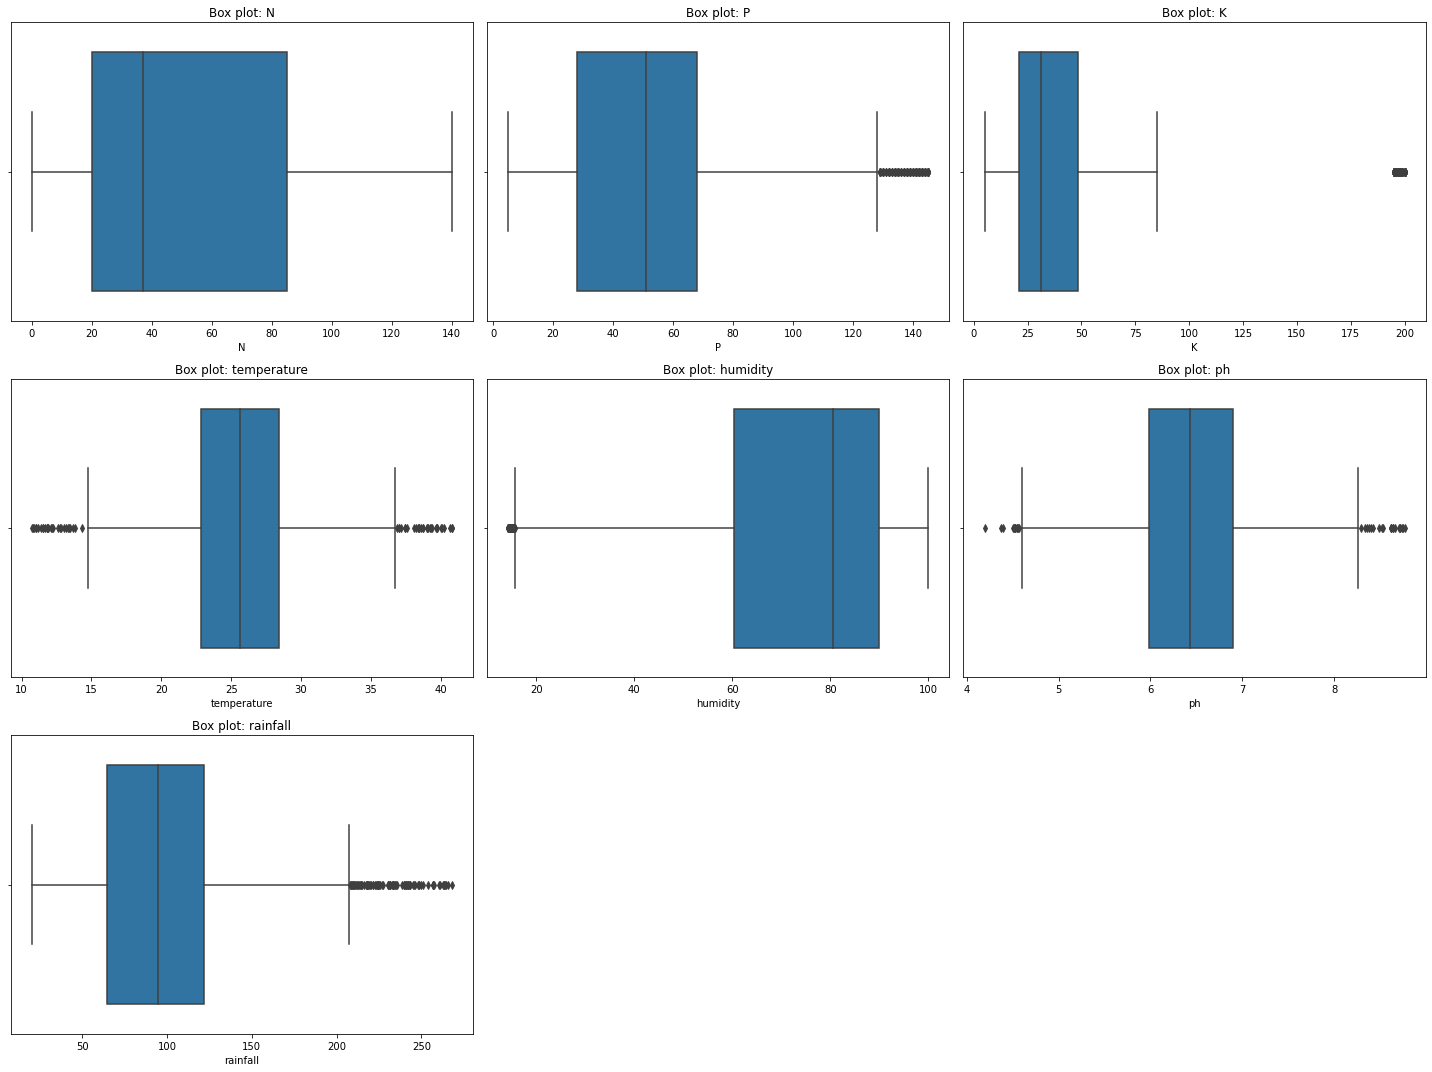

In [2]:
# Outlier
# Identify and replace outliers for each numerical variable
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

outliers_info = pd.DataFrame(columns=['Variable', 'Outliers_Count', 'Mean', 'Std'])

for column in numeric_columns:
    mean_value = df[column].mean()
    std_value = df[column].std()
    # Identify outliers
    outliers = (df[column] < mean_value - 3*std_value) | (df[column] > mean_value + 3*std_value)
    # Store information about outliers
    temp_df = pd.DataFrame({
        'Variable': [column], 
        'Outliers_Count': [outliers.sum()], 
        'Mean': [mean_value], 
        'Std': [std_value]
    })
    outliers_info = pd.concat([outliers_info, temp_df], ignore_index=True)
    # Replace outliers with the mean
    df.loc[outliers, column] = mean_value

print(outliers_info)


# Missing data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Variable distribution
features = df.drop("label", axis=1)
plt.figure(figsize=(15, 10))
features.hist(figsize=(15, 10))
plt.suptitle('Variable Distribution', y=1.02)
plt.tight_layout()
plt.show()

features = df.drop("label", axis=1)

# box plot
n = len(features.columns)
rows = n // 3 + (1 if n % 3 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

if n % 3:
    for idx in range(n % 3, 3):
        fig.delaxes(axes[rows-1][idx])

for idx, column in enumerate(features.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    sns.boxplot(x=features[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Box plot: {column}')

plt.tight_layout()
plt.show()

          label  label_code
0         apple           0
1        banana           1
2     blackgram           2
3      chickpea           3
4       coconut           4
5        coffee           5
6        cotton           6
7        grapes           7
8          jute           8
9   kidneybeans           9
10       lentil          10
11        maize          11
12        mango          12
13    mothbeans          13
14     mungbean          14
15    muskmelon          15
16       orange          16
17       papaya          17
18   pigeonpeas          18
19  pomegranate          19
20         rice          20
21   watermelon          21
          N         P         K  temperature  humidity        ph  rainfall
0 -0.567813 -1.379744 -0.770755    -1.948928  0.936586  0.232573  0.040927
1 -0.326838  0.113219 -0.448555     0.439974 -0.100470  0.963872 -0.606731
2 -0.594588  0.052281 -0.671617     0.435261 -0.382775  1.167169 -1.074104
3  1.011914  0.844465  0.270199    -0.027892  0.157688 -

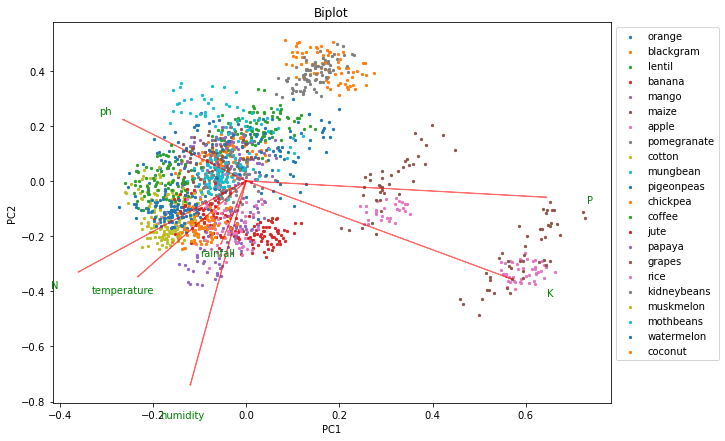

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# label encoding
df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes


X = df.drop(["label", "label_code"], axis=1)
y = df['label_code']


label_mapping = pd.DataFrame({
    'label': df['label'],
    'label_code': df['label_code']
})

label_mapping = label_mapping.drop_duplicates()

label_mapping = label_mapping.sort_values('label_code').reset_index(drop=True)

print(label_mapping)




# train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardzation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())
X_test_scaled = scaler.transform(X_test)

train_test_shapes_annotated = ("Training data shape (features):", X_train.shape, 
                              "Training data shape (labels):", y_train.shape,
                              "Test data shape (features):", X_test.shape,
                              "Test data shape (labels):", y_test.shape)

train_test_shapes_annotated


from sklearn.decomposition import PCA

# Biplot
def biplot(score, coeff, labels=None, colors=None, unique_labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    # Create a scatter plot for each unique label
    if unique_labels is not None:
        for label in unique_labels:
            idx = np.where(colors == label)
            plt.scatter(xs[idx] * scalex, ys[idx] * scaley, s=5, label=df[df['label_code'] == label]['label'].iloc[0])
    else:
        plt.scatter(xs * scalex, ys * scaley, s=5, c=colors, cmap='Set3')
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    
    # Add legend if unique_labels is provided
    if unique_labels is not None:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_scaled)
            
unique_labels = y_train.unique()

plt.figure(figsize=(10, 7))
biplot(pca_result, np.transpose(pca.components_[0:2, :]), labels=X_train.columns, colors=y_train, unique_labels=unique_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot")
plt.show()

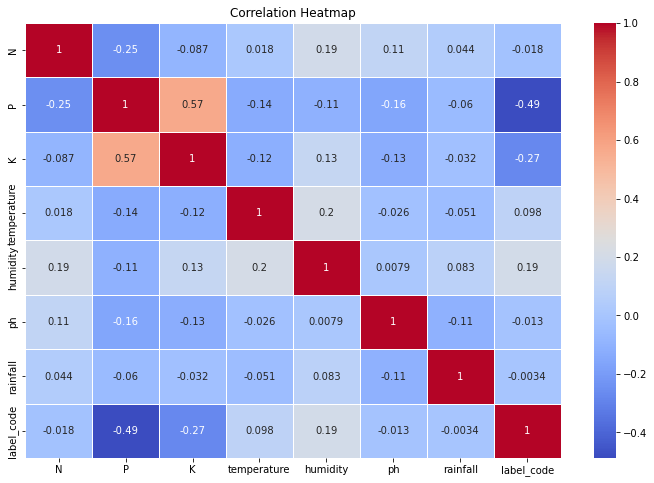

('Correlation with label_code:',
 N             -0.018124
 P             -0.486877
 K             -0.274366
 temperature    0.098416
 humidity       0.193911
 ph            -0.012867
 rainfall      -0.003406
 label_code     1.000000
 Name: label_code, dtype: float64)

In [4]:
# correlation (heat map)
correlation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


label_correlation_annotated = ("Correlation with label_code:", correlation['label_code'])

label_correlation_annotated

In [5]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy_annotated = ("Accuracy of SVM Model:", accuracy_score(y_test, y_pred))

accuracy_annotated

('Accuracy of SVM Model:', 0.9727272727272728)

In [6]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# accuracies = []

# for kern in kernels:
#     # Train the SVM model with the current kernel
#     svm_model = SVC(kernel=kern, random_state=42)
#     svm_model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = svm_model.predict(X_test)
    
#     # Calculate the accuracy
#     acc = accuracy_score(y_test, y_pred)
#     accuracies.append((kern, acc))

# # Display the accuracies
# for kern, acc in accuracies:
#     print(f"Accuracy using {kern} kernel: {acc:.4f}")


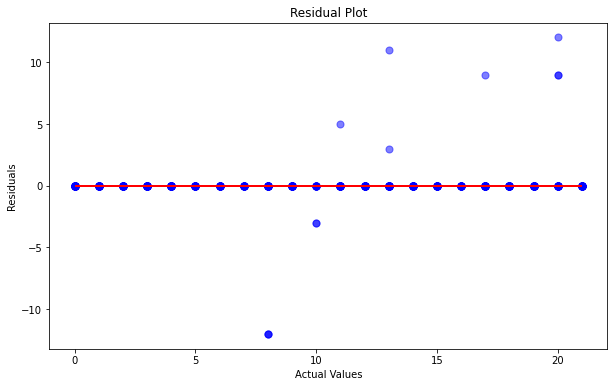

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', s=50, alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), colors='red', linewidths=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


F1 Score: 0.9709023790590795


C:\Users\77525\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


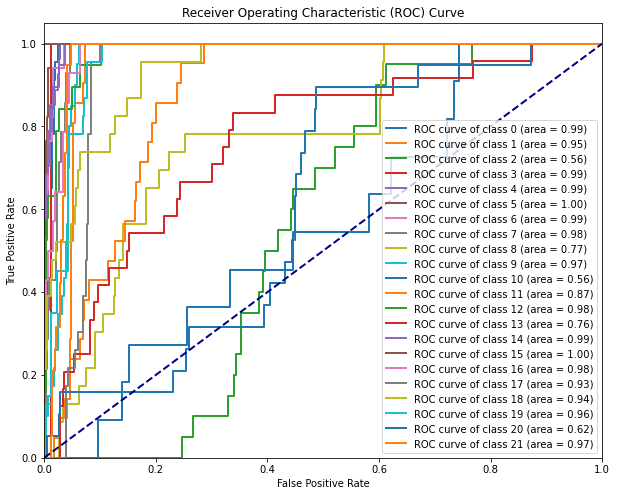

In [8]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# F1
f1 = f1_score(y_test, y_pred, average='macro') 
print("F1 Score:", f1)

# ROC

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = svm_model.decision_function(X_test_scaled)

n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

